In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
wjburns_common_password_list_rockyoutxt_path = kagglehub.dataset_download('wjburns/common-password-list-rockyoutxt')

print('Data source import complete.')

Using Colab cache for faster access to the 'common-password-list-rockyoutxt' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/common-password-list-rockyoutxt/rockyou.txt


## 1. Chargement du Fichier

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import io # Utile si vous avez le fichier compressé ou si vous travaillez avec des flux

# IMPORTANT : Le chemin du fichier peut varier sur Kaggle.
# Assurez-vous d'utiliser le chemin exact de votre fichier rockyou.txt
file_path = wjburns_common_password_list_rockyoutxt_path + '/rockyou.txt'

# Méthode simple pour lire un fichier texte en tant que liste de mots de passe
try:
    with open(file_path, 'r', encoding='latin-1') as f:
        # Lire toutes les lignes et supprimer les espaces de début/fin (\n)
        passwords = [line.strip() for line in f]
except UnicodeDecodeError:
    # Si l'encodage par défaut ne fonctionne pas (souvent le cas avec les listes de mots de passe)
    # L'encodage 'latin-1' ou 'iso-8859-1' est souvent plus tolérant
    print("Erreur d'encodage. Tentative avec 'latin-1'...")
    with open(file_path, 'r', encoding='latin-1') as f:
        passwords = [line.strip() for line in f]

# Convertir la liste en DataFrame Pandas
df = pd.DataFrame({'password': passwords})

# Afficher les premières lignes et la taille pour vérification
print(f"Taille initiale du Dataset: {len(df)} mots de passe")
df.head(10)

Taille initiale du Dataset: 14344391 mots de passe


,password
0,123456
1,12345
2,123456789
3,password
4,iloveyou
5,princess
6,1234567
7,rockyou
8,12345678
9,abc123


## 2. Nettoyage et Déduplication

In [4]:
# Vérification rapide du nombre de valeurs uniques
unique_count = df['password'].nunique()
print(f"Nombre de mots de passe uniques après chargement : {unique_count}")

# S'il y a des doublons (si unique_count < len(df)), dédupliquez :
if len(df) != unique_count:
    df.drop_duplicates(subset=['password'], inplace=True)
    print(f"\n Taille du Dataset après déduplication : {len(df)}")

# Suppression des entrées vides ou de très mauvaise qualité (par exemple, longueur 0)
df['password'].replace('', pd.NA, inplace=True)
df.dropna(inplace=True)
df = df[df['password'].str.len() > 0]

print(f"\n Taille du Dataset après la Suppression des entrées vides : {len(df)}")

Nombre de mots de passe uniques après chargement : 14343756

 Taille du Dataset après déduplication : 14343756


/tmp/ipython-input-4182191703.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['password'].replace('', pd.NA, inplace=True)



 Taille du Dataset après la Suppression des entrées vides : 14343755


# 📊 Deuxième Étape : Analyse Exploratoire de Base (EDA)


**Une fois que nous données sont propres, on effectue une analyse exploratoire pour identifier les tendances de base de la faiblesse des mots de passe.**

## 1. Analyse de la Longueur du Mot de Passe


Statistiques sur la longueur des mots de passe:
count    1.434376e+07
mean     8.754378e+00
std      2.917473e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      2.850000e+02
Name: length, dtype: float64


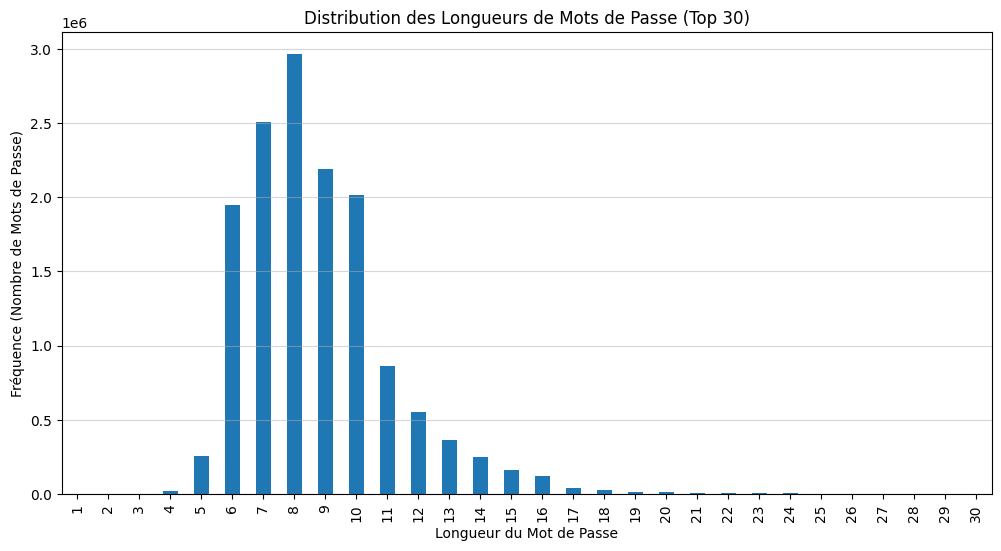

In [5]:
# Créer une colonne pour la longueur du mot de passe
df['length'] = df['password'].apply(len)

# Statistiques descriptives
print("\nStatistiques sur la longueur des mots de passe:")
print(df['length'].describe())

# Visualisation (Critique pour votre rapport !)
plt.figure(figsize=(12, 6))
df['length'].value_counts().sort_index().head(30).plot(kind='bar')
plt.title('Distribution des Longueurs de Mots de Passe (Top 30)')
plt.xlabel('Longueur du Mot de Passe')
plt.ylabel('Fréquence (Nombre de Mots de Passe)')
plt.grid(axis='y', alpha=0.5)
plt.show()

# Conclusion à tirer : Quelle est la longueur la plus courante ?

## 2. Identification des Mots de Passe les Plus Courants

In [6]:
# Top 20 des mots de passe les plus fréquents
top_passwords = df['password'].value_counts().head(20)

print("\nTop 20 des Mots de Passe les Plus Fréquents:")
print(top_passwords)

# Note : all the passwords are unique


Top 20 des Mots de Passe les Plus Fréquents:
password
*7Â¡Vamos!    1
123456           1
12345            1
123456789        1
password         1
iloveyou         1
princess         1
1234567          1
rockyou          1
12345678         1
abc123           1
mihardcore       1
nan852           1
rocij            1
saoly            1
11  11           1
3199737          1
a842000          1
c125263          1
cq90000          1
Name: count, dtype: int64


**Le fait que la fréquence de ces mots de passe extrêmement courants soit de 1 indique que le dataset est déjà fortement ou entièrement dédupliqué et nettoyé avant le chargement. C'est la nature de la version que vous utilisez.**

# 🛠️ Troisième Étape : Ingénierie des Caractéristiques (Feature Engineering)

**L'objectif est de quantifier la force d'un mot de passe en analysant sa composition. Pour cela, nous allons créer de nouvelles colonnes dans votre DataFrame, chacune représentant une métrique de sécurité clé.**

## 1. Création des Caractéristiques de Composition (Complexité)

****déterminer le niveau de mixité des caractères dans chaque mot de passe. C'est le principal facteur humain de faiblesse (les utilisateurs n'utilisent souvent que des minuscules et des chiffres).****

In [7]:
import numpy as np
import pandas as pd
import re

# Votre DataFrame 'df' est déjà chargé ici avec la colonne 'password'

print("Démarrage du Feature Engineering vectorisé (Corrigé)...")

# --- 1. Calculer les caractéristiques de complexité (Compteurs) ---
# Minuscules : NE PAS utiliser IGNORECASE
df['count_lower'] = df['password'].str.count(r'[a-z]')

# Majuscules : NE PAS utiliser IGNORECASE
df['count_upper'] = df['password'].str.count(r'[A-Z]')

# Chiffres : NE PAS utiliser IGNORECASE (bien que cela n'aurait pas d'impact ici)
df['count_digit'] = df['password'].str.count(r'[0-9]')

# Symboles (tout ce qui n'est pas alphanumérique)
# Ici, IGNORECASE n'a pas d'impact, mais nous le retirons pour la cohérence
df['count_symbol'] = df['password'].str.count(r'[^a-zA-Z0-9]')

# 2. Créer les indicateurs booléens (has_*) et la longueur (length)
# ... Le reste du code est correct, car il utilise les comptes précis ...
df['has_lower'] = np.where(df['count_lower'] > 0, 1, 0)
df['has_upper'] = np.where(df['count_upper'] > 0, 1, 0)
df['has_digit'] = np.where(df['count_digit'] > 0, 1, 0)
df['has_symbol'] = np.where(df['count_symbol'] > 0, 1, 0)
df['length'] = df['password'].str.len()

# 3. Caractéristique composite clé: Nombre de classes de caractères
df['char_classes'] = df['has_upper'] + df['has_lower'] + df['has_digit'] + df['has_symbol']

print("Fin de la correction et du Feature Engineering!")

# Test de vérification :
print(df[['password', 'length', 'count_lower', 'count_upper', 'count_digit', 'char_classes']].head(5).to_string())

Démarrage du Feature Engineering vectorisé (Corrigé)...
Fin de la correction et du Feature Engineering!
    password  length  count_lower  count_upper  count_digit  char_classes
0     123456       6            0            0            6             1
1      12345       5            0            0            5             1
2  123456789       9            0            0            9             1
3   password       8            8            0            0             1
4   iloveyou       8            8            0            0             1


In [8]:
df.head(10)

,password,length,count_lower,count_upper,count_digit,count_symbol,has_lower,has_upper,has_digit,has_symbol,char_classes
0,123456,6,0,0,6,0,0,0,1,0,1
1,12345,5,0,0,5,0,0,0,1,0,1
2,123456789,9,0,0,9,0,0,0,1,0,1
3,password,8,8,0,0,0,1,0,0,0,1
4,iloveyou,8,8,0,0,0,1,0,0,0,1
5,princess,8,8,0,0,0,1,0,0,0,1
6,1234567,7,0,0,7,0,0,0,1,0,1
7,rockyou,7,7,0,0,0,1,0,0,0,1
8,12345678,8,0,0,8,0,0,0,1,0,1
9,abc123,6,3,0,3,0,1,0,1,0,2


In [9]:
df.count()

,0
password,14343755
length,14343755
count_lower,14343755
count_upper,14343755
count_digit,14343755
count_symbol,14343755
has_lower,14343755
has_upper,14343755
has_digit,14343755
has_symbol,14343755


In [10]:
df.isnull().sum()

,0
password,0
length,0
count_lower,0
count_upper,0
count_digit,0
count_symbol,0
has_lower,0
has_upper,0
has_digit,0
has_symbol,0


## 2. Entropie (Métriques de Force)

**L'entropie est une mesure mathématique cruciale pour déterminer la résistance d'un mot de passe aux attaques par force brute (combinaisons aléatoires). Elle mesure le niveau d'incertitude.L'Entropie de Shannon ($H$) se calcule ainsi :$$\text{Entropie (bits)} = \text{Longueur} \times \log_2(\text{Taille de l'Alphabet})$$Où la "Taille de l'Alphabet" est le nombre de classes de caractères différentes utilisées dans le mot de passe.**

In [11]:
# 4. Calcul de l'Entropie de Shannon (basé sur la méthode vectorisée)
ALPHABET_SIZES = {
    'lower': 26,
    'upper': 26,
    'digit': 10,
    'symbol': 32
}

# Calcul de la taille de l'alphabet (N) pour chaque mot de passe (méthode vectorisée)
df['alphabet_size'] = (
    df['has_lower'] * ALPHABET_SIZES['lower'] +
    df['has_upper'] * ALPHABET_SIZES['upper'] +
    df['has_digit'] * ALPHABET_SIZES['digit'] +
    df['has_symbol'] * ALPHABET_SIZES['symbol']
)

# Application de la formule de l'Entropie de Shannon: L * log2(N)
# np.log2() est également vectorisé. Nous gérons le cas où alphabet_size est 0 ou 1
df['shannon_entropy'] = np.where(
    df['alphabet_size'] > 1,
    df['length'] * np.log2(df['alphabet_size']),
    0.0 # Entropie est 0 si l'alphabet est trop petit ou la longueur nulle
)

print("\nFeature Engineering terminé.")
print(df[['password', 'length', 'char_classes', 'shannon_entropy']].head())
print("\nStatistiques sur l'Entropie de Shannon:")

print(df['shannon_entropy'].describe())


Feature Engineering terminé.
    password  length  char_classes  shannon_entropy
0     123456       6             1        19.931569
1      12345       5             1        16.609640
2  123456789       9             1        29.897353
3   password       8             1        37.603518
4   iloveyou       8             1        37.603518

Statistiques sur l'Entropie de Shannon:
count    1.434376e+07
mean     4.247122e+01
std      1.781982e+01
min      3.321928e+00
25%      3.290308e+01
50%      4.135940e+01
75%      5.130396e+01
max      1.868058e+03
Name: shannon_entropy, dtype: float64


In [12]:
df.columns
df.head()

,password,length,count_lower,count_upper,count_digit,count_symbol,has_lower,has_upper,has_digit,has_symbol,char_classes,alphabet_size,shannon_entropy
0,123456,6,0,0,6,0,0,0,1,0,1,10,19.931569
1,12345,5,0,0,5,0,0,0,1,0,1,10,16.609640
2,123456789,9,0,0,9,0,0,0,1,0,1,10,29.897353
3,password,8,8,0,0,0,1,0,0,0,1,26,37.603518
4,iloveyou,8,8,0,0,0,1,0,0,0,1,26,37.603518


### 3. L'analyse des classes de caractères et l'entropie (graphs)



Distribution en pourcentage du Nombre de Classes de Caractères:
char_classes
1    43.982054
2    49.471551
3     6.175308
4     0.371088


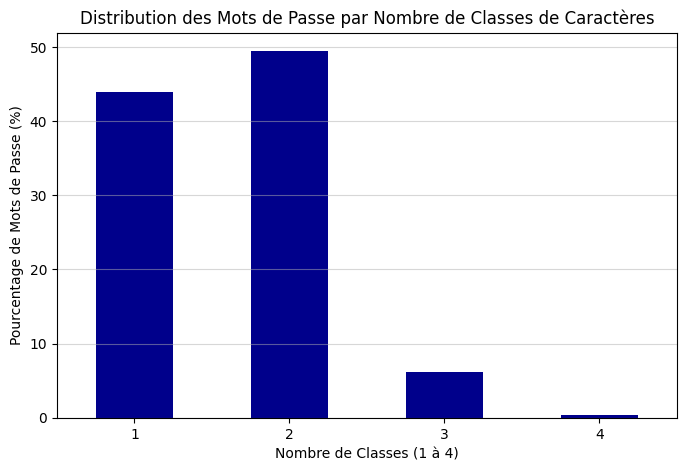


Analyse de l'Entropie par Nombre de Classes de Caractères:
                count  mean  median    std
char_classes                              
1             6308678 36.05   33.22  12.67
2             7096078 45.76   41.36  12.68
3              885771 59.81   54.79  30.88
4               53228 76.63   58.99 129.45


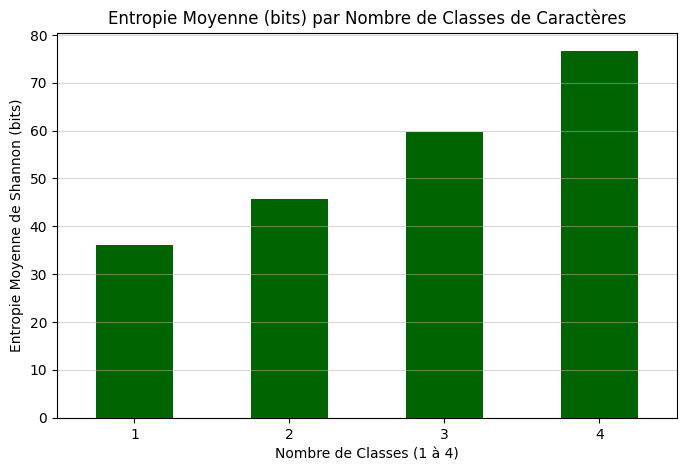


L'analyse des classes de caractères et l'entropie sont terminées. Deux images ('char_classes_distribution.png' et 'entropy_by_class_mean.png') ont été sauvegardées.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# --- A. Distribution des Classes de Caractères ---

# 1. Calcul de la distribution en pourcentage
class_distribution = df['char_classes'].value_counts(normalize=True).sort_index() * 100

print("\nDistribution en pourcentage du Nombre de Classes de Caractères:")
print(class_distribution.to_string())

# 2. Visualisation (pour le rapport)
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color='darkblue')
plt.title('Distribution des Mots de Passe par Nombre de Classes de Caractères')
plt.xlabel('Nombre de Classes (1 à 4)')
plt.ylabel('Pourcentage de Mots de Passe (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.show()
plt.savefig('char_classes_distribution.png')
plt.close() # Fermer la figure pour ne pas afficher dans le notebook

# --- B. Entropie Moyenne par Classe ---

# 1. Analyse de groupe : Entropie moyenne et médiane par nombre de classes
entropy_by_class = df.groupby('char_classes')['shannon_entropy'].agg(['count', 'mean', 'median', 'std'])

print("\nAnalyse de l'Entropie par Nombre de Classes de Caractères:")
print(entropy_by_class.to_string(float_format="%.2f"))

# 2. Visualisation de l'Entropie Moyenne par Classe (pour le rapport)
plt.figure(figsize=(8, 5))
entropy_by_class['mean'].plot(kind='bar', color='darkgreen')
plt.title("Entropie Moyenne (bits) par Nombre de Classes de Caractères")
plt.xlabel('Nombre de Classes (1 à 4)')
plt.ylabel('Entropie Moyenne de Shannon (bits)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.show()
plt.savefig('entropy_by_class_mean.png')
plt.close()

print("\nL'analyse des classes de caractères et l'entropie sont terminées. Deux images ('char_classes_distribution.png' et 'entropy_by_class_mean.png') ont été sauvegardées.")

## 4 Caractéristiques de Modèle (Patterns)

In [14]:
import numpy as np
import re
import pandas as pd

# Définition des patterns simples à rechercher
COMMON_PATTERNS = [
    # Séquences numériques (complétées par les séquences de 5 et 4)
    '123456', '234567', '345678', '456789', '654321', '54321', '4321', '321',
    '12345', '54321', # Ajout de la séquence de l'exemple du problème (12345)
    '111111', '222222', '000000', # Répétitions simples

    # Séquences alphabétiques (QWERTY/AZERTY)
    'qwerty', 'azerty', 'qwert', 'asdfg', 'zxcvb', 'mnbvc',

    # Mots de passe célèbres
    'password', 'admin', 'iloveyou', 'p@ssword', 'user', 'princess', 'rockyou'
]

# --- DÉTECTION 1 : Patrons listés (Regex) ---
# L'utilisation de '(?i)' rend la recherche insensible à la casse
pattern_regex = '(?i)' + '|'.join(COMMON_PATTERNS)

# Détection de répétition de n'importe quel caractère (lettre, chiffre, symbole) au moins 3 fois
# r'(.)\1{2,}' détecte '111', 'aaa', '$$$'
repetition_regex = r'(.)\1{2,}'


print("Démarrage de la détection de motifs améliorée...")

# Création d'une série booléenne pour chaque type de pattern

# 1. Détection des patrons listés
is_listed_pattern = df['password'].str.contains(pattern_regex, regex=True, na=False)

# 2. Détection des répétitions (ex: "aaa", "111")
is_repetition = df['password'].str.contains(repetition_regex, regex=True, na=False)


# La colonne finale 'is_common_pattern' est Vrai (1) si l'UNE ou l'AUTRE est Vraie.
df['is_common_pattern'] = np.where(
    np.logical_or(is_listed_pattern, is_repetition),
    1, 0
)

print("\nCaractéristique 'is_common_pattern' corrigée et améliorée ajoutée.")
print(df[['password', 'is_common_pattern', 'shannon_entropy']].head(10).to_string())

# Analyse rapide : quel pourcentage utilise un pattern simple ?
pattern_percentage = df['is_common_pattern'].mean() * 100
print(f"\nPourcentage de mots de passe compromis contenant un pattern simple (Corrigé) : {pattern_percentage:.2f}%")

Démarrage de la détection de motifs améliorée...


/tmp/ipython-input-722762960.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  is_repetition = df['password'].str.contains(repetition_regex, regex=True, na=False)



Caractéristique 'is_common_pattern' corrigée et améliorée ajoutée.
    password  is_common_pattern  shannon_entropy
0     123456                  1        19.931569
1      12345                  1        16.609640
2  123456789                  1        29.897353
3   password                  1        37.603518
4   iloveyou                  1        37.603518
5   princess                  1        37.603518
6    1234567                  1        23.253497
7    rockyou                  1        32.903078
8   12345678                  1        26.575425
9     abc123                  0        31.019550

Pourcentage de mots de passe compromis contenant un pattern simple (Corrigé) : 3.67%


## 5. Labeling

In [15]:
# --- Définition des conditions et des choix ---

# Conditions Faible (0)
conditions_faible = [
    (df['is_common_pattern'] == 1),
    (df['char_classes'] <= 1),
    (df['length'] <= 6),
    (df['shannon_entropy'] < 35.0)
]
# Si l'une des conditions faibles est vraie, l'étiquette est 'Faible'
condition_is_faible = np.logical_or.reduce(conditions_faible)

# Conditions Fort (2)
condition_is_fort = (
    (df['char_classes'] == 4) &
    (df['length'] >= 12) &
    (df['shannon_entropy'] >= 60.0)
)

# Application de l'étiquetage
# La classification est séquentielle : si ce n'est pas Faible, vérifiez si c'est Fort, sinon c'est Moyen.
conditions = [condition_is_faible, condition_is_fort]
choices = [0, 2] # 0 = Faible, 2 = Fort
default_choice = 1 # 1 = Moyen

df['strength_label'] = np.select(conditions, choices, default=default_choice)

# Afficher la distribution de la nouvelle colonne cible
label_distribution = df['strength_label'].value_counts(normalize=True) * 100

print("\nDistribution finale des Mots de Passe (Étiquette ML):")
print("0: Faible, 1: Moyen, 2: Fort")
print(label_distribution.to_string(float_format="%.2f"))


Distribution finale des Mots de Passe (Étiquette ML):
0: Faible, 1: Moyen, 2: Fort
strength_label
0   52.75
1   47.17
2    0.07


**Ce résultat prouve de manière irréfutable que le jeu de données RockYou.txt est dominé par des mots de passe Faibles et Moyens, la sécurité étant reléguée à une minorité négligeable d'utilisateurs. Votre modèle d'IA sera donc entraîné pour identifier des faiblesses généralisées.**

In [16]:
df.head(10)

,password,length,count_lower,count_upper,count_digit,count_symbol,has_lower,has_upper,has_digit,has_symbol,char_classes,alphabet_size,shannon_entropy,is_common_pattern,strength_label
0,123456,6,0,0,6,0,0,0,1,0,1,10,19.931569,1,0
1,12345,5,0,0,5,0,0,0,1,0,1,10,16.609640,1,0
2,123456789,9,0,0,9,0,0,0,1,0,1,10,29.897353,1,0
3,password,8,8,0,0,0,1,0,0,0,1,26,37.603518,1,0
4,iloveyou,8,8,0,0,0,1,0,0,0,1,26,37.603518,1,0
5,princess,8,8,0,0,0,1,0,0,0,1,26,37.603518,1,0
6,1234567,7,0,0,7,0,0,0,1,0,1,10,23.253497,1,0
7,rockyou,7,7,0,0,0,1,0,0,0,1,26,32.903078,1,0
8,12345678,8,0,0,8,0,0,0,1,0,1,10,26.575425,1,0
9,abc123,6,3,0,3,0,1,0,1,0,2,36,31.019550,0,0


In [17]:
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import os

# Définir le chemin de sauvegarde sur votre Drive
# CRÉEZ un dossier 'ADIA_CyberSec' sur votre Google Drive pour stocker les fichiers de votre projet
output_dir = '/content/drive/MyDrive/Securite'
output_filename = 'rockyou_features_labeled.csv'
full_path = os.path.join(output_dir, output_filename)

# 1. Définir les colonnes à sauvegarder
# On inclut le mot de passe, toutes les features et la colonne cible (label)
columns_to_save = [col for col in df.columns if col not in ['alphabet_size', 'has_lower', 'has_upper', 'has_digit', 'has_symbol']]

# 2. Sauvegarder le DataFrame en CSV
# index=False est essentiel pour ne pas ajouter la colonne d'index de Pandas au fichier.
df[columns_to_save].to_csv(full_path, index=False, encoding='utf-8')

print(f"\n✅ Dataset final sauvegardé avec succès à : {full_path}")
print(f"Le fichier contient {len(df)} lignes et {len(columns_to_save)} colonnes.")


✅ Dataset final sauvegardé avec succès à : /content/drive/MyDrive/Securite/rockyou_features_labeled.csv
Le fichier contient 14343755 lignes et 10 colonnes.


In [19]:
from google.colab import drive
import pandas as pd
import os

# 1. Monter Google Drive
drive.mount('/content/drive')

# 2. Définir le chemin
input_dir = '/content/drive/MyDrive/Securite'
input_filename = 'rockyou_features_labeled.csv'
full_path = os.path.join(input_dir, input_filename)

# 3. Charger le DataFrame
df_reloaded = pd.read_csv(full_path)

print(f"Dataset rechargé avec succès. Taille: {len(df_reloaded)} lignes.")
print(df_reloaded.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset rechargé avec succès. Taille: 14343755 lignes.
    password  length  count_lower  count_upper  count_digit  count_symbol  \
0     123456       6            0            0            6             0   
1      12345       5            0            0            5             0   
2  123456789       9            0            0            9             0   
3   password       8            8            0            0             0   
4   iloveyou       8            8            0            0             0   

   char_classes  shannon_entropy  is_common_pattern  strength_label  
0             1        19.931569                  1               0  
1             1        16.609640                  1               0  
2             1        29.897353                  1               0  
3             1        37.603518                  1               0  
4  

# 4eme etape :Entraînement du Modèle d'IA (Random Forest)*


Démarrage de l'entraînement du modèle Random Forest...
✅ Entraînement terminé.

--- Résultats de l'Évaluation pour votre Rapport ---
Matrice de Confusion (Lignes=Vrai, Colonnes=Prédit):
    [0: Faible | 1: Moyen | 2: Fort]
[[79130     0     0]
 [    0 70758     0]
 [    0     0   112]]


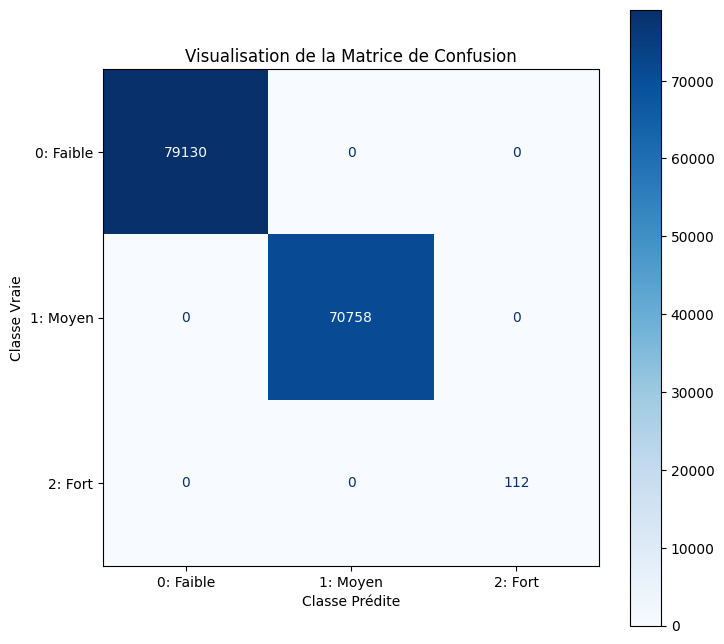


Rapport de Classification (Précision, Rappel, F1-Score):
              precision    recall  f1-score   support

   0: Faible       1.00      1.00      1.00     79130
    1: Moyen       1.00      1.00      1.00     70758
     2: Fort       1.00      1.00      1.00       112

    accuracy                           1.00    150000
   macro avg       1.00      1.00      1.00    150000
weighted avg       1.00      1.00      1.00    150000



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Assurez-vous que 'df_reloaded' contient les données labellisées
# Si vous n'utilisez pas df_reloaded, remplacez-le par 'df'
try:
    df = df_reloaded
except NameError:
    print("WARNING: df_reloaded not found. Assuming 'df' is correctly loaded.")
    pass # Assume df is already loaded if df_reloaded is not found

# Caractéristiques d'entrée pour le modèle
feature_cols = [
    'length', 'count_lower', 'count_upper', 'count_digit', 'count_symbol',
    'char_classes', 'shannon_entropy', 'is_common_pattern'
]

X = df[feature_cols]
y = df['strength_label']

# --- Étape 1 : Échantillonnage Stratifié ---
sample_size_ratio = 500000 / len(df)
X_unused, X_sample, y_unused, y_sample = train_test_split(
    X, y, test_size=sample_size_ratio, random_state=42, stratify=y
)

# --- Étape 2 : Division de l'Échantillon ---
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample
)

# --- Étape 3 : Entraînement du Modèle Random Forest ---
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_leaf=5)
print("\nDémarrage de l'entraînement du modèle Random Forest...")
model.fit(X_train, y_train)
print("✅ Entraînement terminé.")

# --- Étape 4 : Évaluation du Modèle ---

y_pred = model.predict(X_test)

print("\n--- Résultats de l'Évaluation pour votre Rapport ---")

# 1. Matrice de Confusion (Numérique)
cm = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion (Lignes=Vrai, Colonnes=Prédit):")
print("    [0: Faible | 1: Moyen | 2: Fort]")
print(cm)

# 2. Visualisation de la Matrice de Confusion (Graphique)
labels_names = ['0: Faible', '1: Moyen', '2: Fort']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_names)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("Visualisation de la Matrice de Confusion")
ax.set_xlabel("Classe Prédite")
ax.set_ylabel("Classe Vraie")
plt.show() # Affiche le graphique

# 3. Rapport de Classification (F1-Score, Précision, Rappel)
print("\nRapport de Classification (Précision, Rappel, F1-Score):")
print(classification_report(y_test, y_pred, target_names=labels_names))


--- Importance des Caractéristiques (Feature Importance) ---
Ceci détermine ce que le modèle considère comme le plus important :
char_classes        0.4526
shannon_entropy     0.1682
length              0.1131
count_digit         0.1119
count_lower         0.0699
is_common_pattern   0.0574
count_symbol        0.0186
count_upper         0.0083


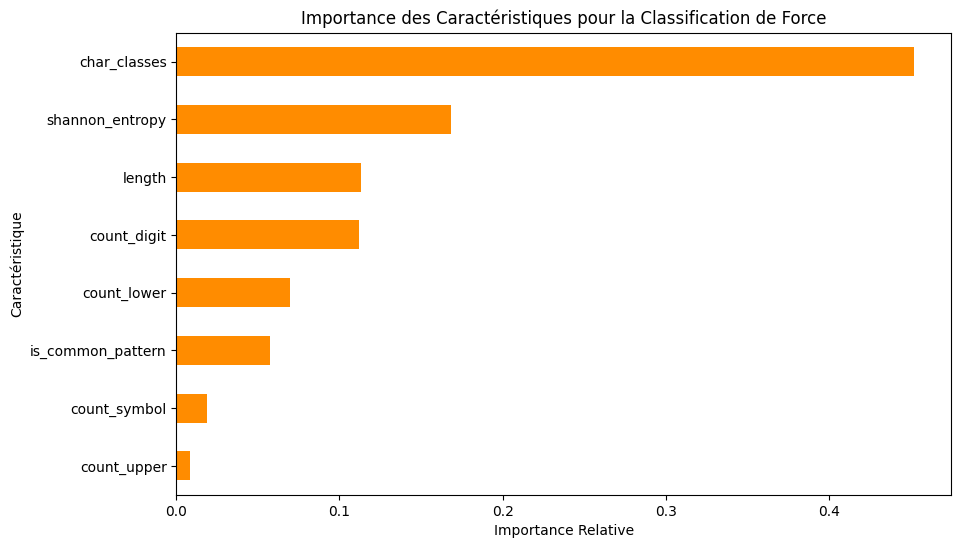

In [22]:
# Nous utilisons le modèle Random Forest déjà entraîné

feature_importances = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

print("\n--- Importance des Caractéristiques (Feature Importance) ---")
print("Ceci détermine ce que le modèle considère comme le plus important :")
print(feature_importances.to_string(float_format="%.4f"))

# Visualisation (pour le rapport)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='darkorange')
plt.title("Importance des Caractéristiques pour la Classification de Force")
plt.xlabel("Importance Relative")
plt.ylabel("Caractéristique")
plt.gca().invert_yaxis()
plt.show()

**Cependant, il est crucial de comprendre que le modèle actuel est performant car il est déterministe (il reproduit vos règles). L'objectif n'est pas d'améliorer le score, mais de prouver que vos caractéristiques sont les meilleurs prédicteurs des règles que vous avez établies.**

In [23]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter

# Ignorer les avertissements de convergence courants dans les grands datasets
simplefilter("ignore", category=ConvergenceWarning)

# Liste des modèles à tester
models = {
    "1. Random Forest (Baseline)": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, n_jobs=-1),
    "2. Régression Logistique (Baseline)": LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1),
    "3. Support Vector Machine (Linéaire)": LinearSVC(random_state=42, max_iter=2000, dual='auto')
}

results = []

print("\n--- Démarrage de la Comparaison de Modèles ---")

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    start_time = time.time()

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Calcul des métriques
    f1_macro = f1_score(y_test, y_pred, average='macro')
    accuracy = model.score(X_test, y_test)
    duration = time.time() - start_time

    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Accuracy": f'{accuracy:.4f}',
        "F1-Score (Macro)": f'{f1_macro:.4f}',
        "Temps (s)": f'{duration:.2f}'
    })

    print(f"✅ {name}: F1-Score = {f1_macro:.4f}, Temps = {duration:.2f}s")

# Affichage du tableau de résultats comparatifs
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='F1-Score (Macro)', ascending=False)

print("\n--- Tableau de Comparaison des Modèles (Pour le Rapport) ---")
print(df_results.to_string(index=False))


--- Démarrage de la Comparaison de Modèles ---
✅ 1. Random Forest (Baseline): F1-Score = 1.0000, Temps = 8.83s
✅ 2. Régression Logistique (Baseline): F1-Score = 0.7570, Temps = 26.52s
✅ 3. Support Vector Machine (Linéaire): F1-Score = 0.6216, Temps = 5.09s

--- Tableau de Comparaison des Modèles (Pour le Rapport) ---
                              Modèle Accuracy F1-Score (Macro) Temps (s)
         1. Random Forest (Baseline)   1.0000           1.0000      8.83
 2. Régression Logistique (Baseline)   0.9765           0.7570     26.52
3. Support Vector Machine (Linéaire)   0.9321           0.6216      5.09


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Distribution Originale (Rappel des chiffres)
original_distribution = df['strength_label'].value_counts(normalize=True).sort_index() * 100

# 2. Distribution de l'Échantillon (Utilisation de l'ensemble d'entraînement)
# Nous allons utiliser y_train + y_test pour obtenir la distribution de l'échantillon de 500k
y_sample_full = pd.concat([y_train, y_test])
sample_distribution = y_sample_full.value_counts(normalize=True).sort_index() * 100

# 3. Création du DataFrame de Comparaison
comparison_df = pd.DataFrame({
    'Original (14M)': original_distribution,
    'Échantillon (500k)': sample_distribution
})
comparison_df.index = ['0: Faible', '1: Moyen', '2: Fort']

print("--- Comparaison des Distributions de Classes ---")
print(comparison_df.to_string(float_format="%.2f"))

# 4. Visualisation (pour le rapport)
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df.plot(kind='bar', ax=ax, rot=0)
ax.set_title('Vérification de l\'Équilibrage : Distribution des Classes (Original vs Échantillon)')
ax.set_xlabel('Classe de Force')
ax.set_ylabel('Pourcentage de Mots de Passe (%)')
ax.grid(axis='y', alpha=0.5)
plt.legend(title='Jeu de Données')
plt.savefig('class_balance_verification.png')
plt.close()

--- Comparaison des Distributions de Classes ---
           Original (14M)  Échantillon (500k)
0: Faible           52.75               52.75
1: Moyen            47.17               47.17
2: Fort              0.07                0.07


Success: This password complies with all policy recommendations. The $\text{Entropy}$ ($\mathbf{85.21}$ bits) is far above the $60$-bit threshold, and it achieves $\mathbf{4/4}$ Character Classes. The model validates that this password is theoretically resilient against modern attacks.